In [9]:
import numpy as np
import scipy.integrate as integrate
import scipy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd

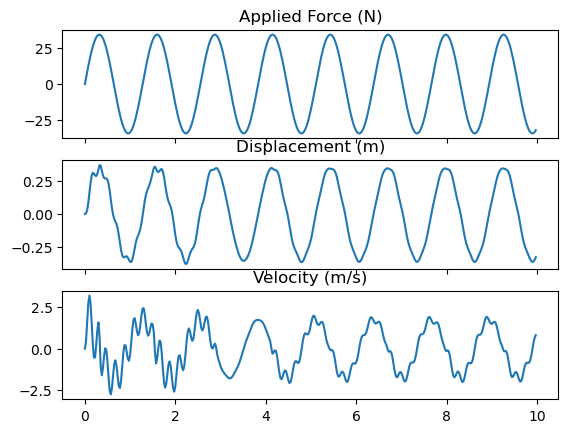

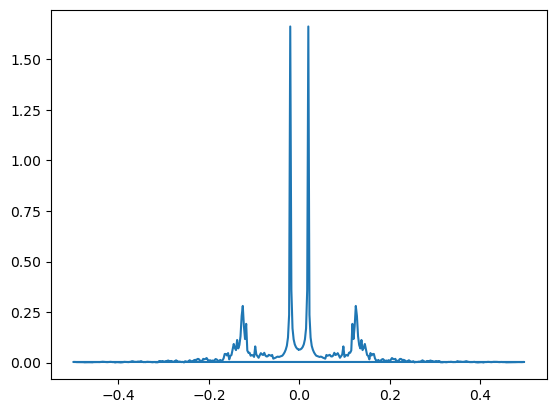

400


'd= 0.34, m = 0.11, c1 = 0.13, k1 = 99.21, k2 = 161.45, F = 34.6*sin(4.92t)'

In [10]:
m = np.random.uniform(.1,.25) # mass, kg
c1 = np.random.uniform(.1,0.3) # damper attached to mass, Ns/m
k1 = np.random.uniform(10,100) # spring attached to mass, N/m
a = np.random.uniform(10,50) # force amplitude, N
w = np.random.uniform(1,20) # force frequency, rad/s
k2 = np.random.uniform(k1,4*k1) # second spring, N/m
d = np.random.uniform(0,a/k1) # distance from x=0 to the second spring, m

tlist = np.arange(0,10,.025)

def force(t): return a*np.sin(w*t)

def mysystem(x,t):
    dx1dt = x[1]
    dx2dt = (force(t) - c1*x[1] - np.heaviside(x[0]-d,1)*k2*(x[0]-d) - k1*x[0])/m
    dxdt = [dx1dt,dx2dt]
    return dxdt

x = integrate.odeint(func = mysystem,t = tlist,y0 = [0,0])

x1 = x[:,0]
x2 = x[:,1]

fig, axs = plt.subplots(3, sharex=True)
axs[0].plot(tlist,a*np.sin(w*tlist))
axs[0].set_title('Applied Force (N)')
axs[1].plot(tlist,x1)
axs[1].set_title('Displacement (m)')
axs[2].plot(tlist,x2)
axs[2].set_title('Velocity (m/s)')
plt.show()

velofft = fft.fft(x2)
N = np.size(velofft)
T = .025
xf = fft.fftfreq(len(tlist))
yf = 2/N * np.abs(velofft)
plt.plot(xf, yf)
plt.show()

print(len(xf))
f'd= {round(d,2)}, m = {round(m,2)}, c1 = {round(c1,2)}, k1 = {round(k1,2)}, k2 = {round(k2,2)}, F = {round(a,2)}*sin({round(w,2)}t)'

In [11]:
%%time

num_sims = 2500
data = np.empty([num_sims,407])

time = np.arange(0,10,.025)

def force(t): return a*np.sin(w*t)

def nonlinear(x,t):
    dx1dt = x[1]
    dx2dt = (force(t) - c1*x[1] - np.heaviside(x[0]-d,1)*k2*(x[0]-d) - k1*x[0])/m
    dxdt = [dx1dt,dx2dt]
    return dxdt

for i in range(num_sims):
    m = np.random.uniform(.1,.25)
    c1 = np.random.uniform(.1,.3)
    k1 = np.random.uniform(10,100)
    a = np.random.uniform(10,50)
    w = np.random.uniform(1,20)
    k2 = np.random.uniform(k1,4*k1)
    d = np.random.uniform(0,a/k1)
    x = integrate.odeint(func = nonlinear,t = time,y0 = [0,0])
    FD = 2/N * np.abs(fft.fft(x[:,1]))
    data[i,0] = m
    data[i,1] = c1
    data[i,2] = k1
    data[i,3] = a
    data[i,4] = w
    data[i,5] = k2
    data[i,6] = d
    for el in range(400):
        data[i,7+el] = FD[el]

Wall time: 1min 29s


In [12]:
pd.DataFrame(data).to_csv("NL_Dynamics_2500_Samples.csv")